In [ ]:
# torch with cuda
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from ultralytics import YOLO
import torch
import os

# Load a model
# model = YOLO("best.onnx")
model = YOLO("yolo11n.pt")

path = os.path.join(os.path.abspath("."),"License Plate Recognition.v6i.yolov11.zip")

# Train the model
train_results = model.train(
    data=path,  # path to dataset YAML
    epochs=100,  # number of training epochs
    # workers=100,
    # patience=20,
    imgsz=640,  # training image size
    device="cuda" if torch.cuda.is_available() else "cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

In [ ]:
import cv2

def run(img):
    results = model(img)
    results[0].show()
    print(results[0])

# Perform object detection on an image
img = cv2.imread("example.jpg")
run(img)
# img = cv2.flip(img, 0)
# run(img)
# img = cv2.flip(img, 1)
# run(img)
# img = cv2.flip(img, 0)
# run(img)

In [ ]:
import cv2
import os
import numpy as np
import torch
from matplotlib import pyplot as plt
from ultralytics import YOLO

model_path = os.path.join(os.path.abspath("."),"models","first10ktrain","weights","best.onnx")
model = YOLO(model_path, task='detect')

def add_noise(bboxes, mean=0, std_dev=5):
    noise = np.random.normal(mean, std_dev, bboxes.shape)
    noisy_bboxes = bboxes + noise
    return noisy_bboxes

def extract_bboxes(results):
    #bounding boxes can be extracted like that:
    bboxes = results[0].boxes.xyxy.cpu().numpy()
    return bboxes
    #trying to add noise and add it on the picture (doesn't work yet)
    # noisy_bboxes = add_noise(bboxes)
    # results[0].boxes.xyxy = torch.tensor(noisy_bboxes, device=results[0].boxes.xyxy.device)

    return results

# Perform object detection on an image
img = cv2.imread("example.jpg")
results = model(img)

# print(extract_bboxes(results))
# print(results[0].boxes.cpu().numpy())
# print(results[0])
# results[0].show()

Loading d:\safen\Ben_T\Studium\Ml_Praktikum\NumberPlateRecognition\safe_video\number_plate_recognition\models\first10ktrain\weights\best.onnx for ONNX Runtime inference...
Preferring ONNX Runtime TensorrtExecutionProvider
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************

0: 640x640 4 License_Plates, 13.5ms
Speed: 2.5ms preprocess, 13.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
[[[125 142 163]
  [114 130 153]
  [136 153 179]
  ...
  [ 64  40  40]
  [ 57  38  41]
  [ 52  38  44]

array([[[125, 142, 163],
        [114, 130, 153],
        [136, 153, 179],
        ...,
        [ 64,  40,  40],
        [ 57,  38,  41],
        [ 52,  38,  44]],

       [[126, 143, 164],
        [111, 129, 152],
        [134, 151, 178],
        ...,
        [ 63,  39,  39],
        [ 56,  37,  40],
        [ 50,  36,  42]],

       [[126, 144, 167],
        [110, 128, 151],
        [134, 151, 178],
        ...,
        [ 64,  40,  40],
        [ 58,  39,  42],
        [ 51,  37,  43]],

       ...,

       [[179, 179, 185],
        [179, 179, 185],
        [179, 179, 185],
        ...,
        [175, 163, 159],
        [176, 164, 160],
        [177, 165, 161]],

       [[178, 178, 184],
        [179, 179, 185],
        [179, 179, 185],
        ...,
        [176, 164, 158],
        [175, 163, 157],
        [173, 161, 155]],

       [[178, 178, 184],
        [179, 179, 185],
        [179, 179, 185],
        ...,
        [176, 164, 158],
        [175, 163, 157],
        [173, 161, 155]]

_________________________


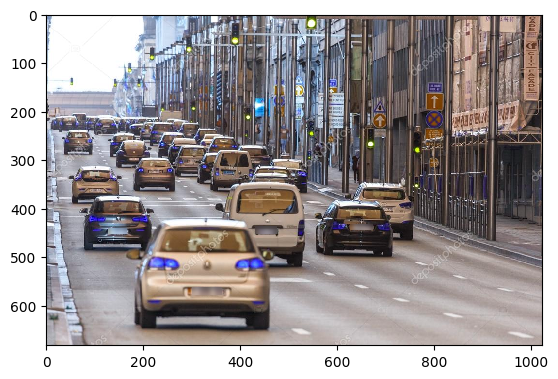

In [ ]:
from plate_recognition import NumberPlateRecognition
import cv2
from matplotlib import pyplot as plt
from PIL import Image

rec = NumberPlateRecognition()
img = cv2.imread("example.jpg")
analyzed_img = rec.analyze(img)
result = rec.blur_image(img, analyzed_img.boxes)
print(result)

plt.imshow(img, interpolation='nearest')
plt.imshow(result, interpolation='nearest')
print("_________________________")
original = Image.fromarray(img, 'RGB')
#original.show()
result2 = Image.fromarray(result, 'RGB')
#result2.show()